### HR dataset 설명

10개의 컬럼으로 구성된 15000개의 데이터이다.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# 모든 컬럼 보기 위한
pd.set_option('display.max_columns', None)

# 모델 저장
import pickle

In [2]:
# https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction

# 데이터 로드 및 탐색적 분석 (EDA)

In [3]:
df0 = pd.read_csv("HR_comma_sep.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# 컬럼 이름 다듬기
df0 = df0.rename(columns={'average_montly_hours' : 'average_monthly_hours',
                         'time_spend_company' : 'tenure',
                         'Work_accident' : 'work_accident',
                         'Department' : 'department'})

In [7]:
#결측치 없음
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
df0.duplicated().sum()

3008

In [9]:
# 중복데이터 제거
df1 = df0.drop_duplicates(keep='first')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
#이상치 추정 컬럼 조사
df1['tenure'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: tenure, dtype: int64

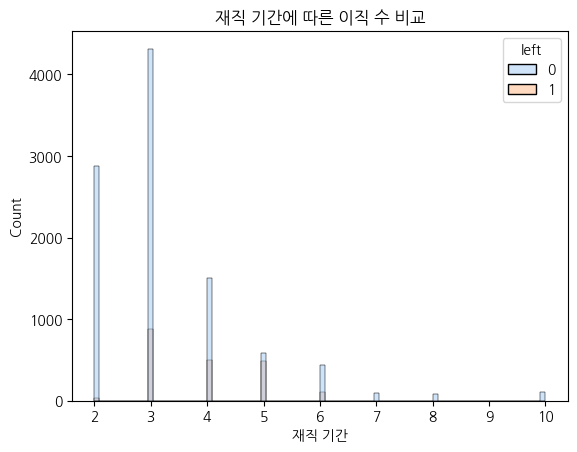

In [12]:
sns.histplot(data=df1, stat="count", x="tenure",
             kde=False, palette="pastel", hue="left",
             element="bars", legend=True)
plt.xlabel("재직 기간")

plt.title("재직 기간에 따른 이직 수 비교")
plt.show()

In [13]:
# 7년 이상 근무한 사람 중 떠난 사람은 없고, 9년차는 사람이 없다.
df1[['tenure', 'left']].groupby(['tenure']).agg(['mean', 'count'])

left      
            mean count
tenure                
2       0.010653  2910
3       0.168401  5190
4       0.246883  2005
5       0.453861  1062
6       0.201107   542
7       0.000000    94
8       0.000000    81
10      0.000000   107

In [14]:
# 타겟 컬럼(사직)은 불균형
print(df1['left'].value_counts(normalize=True))

0    0.833959
1    0.166041
Name: left, dtype: float64


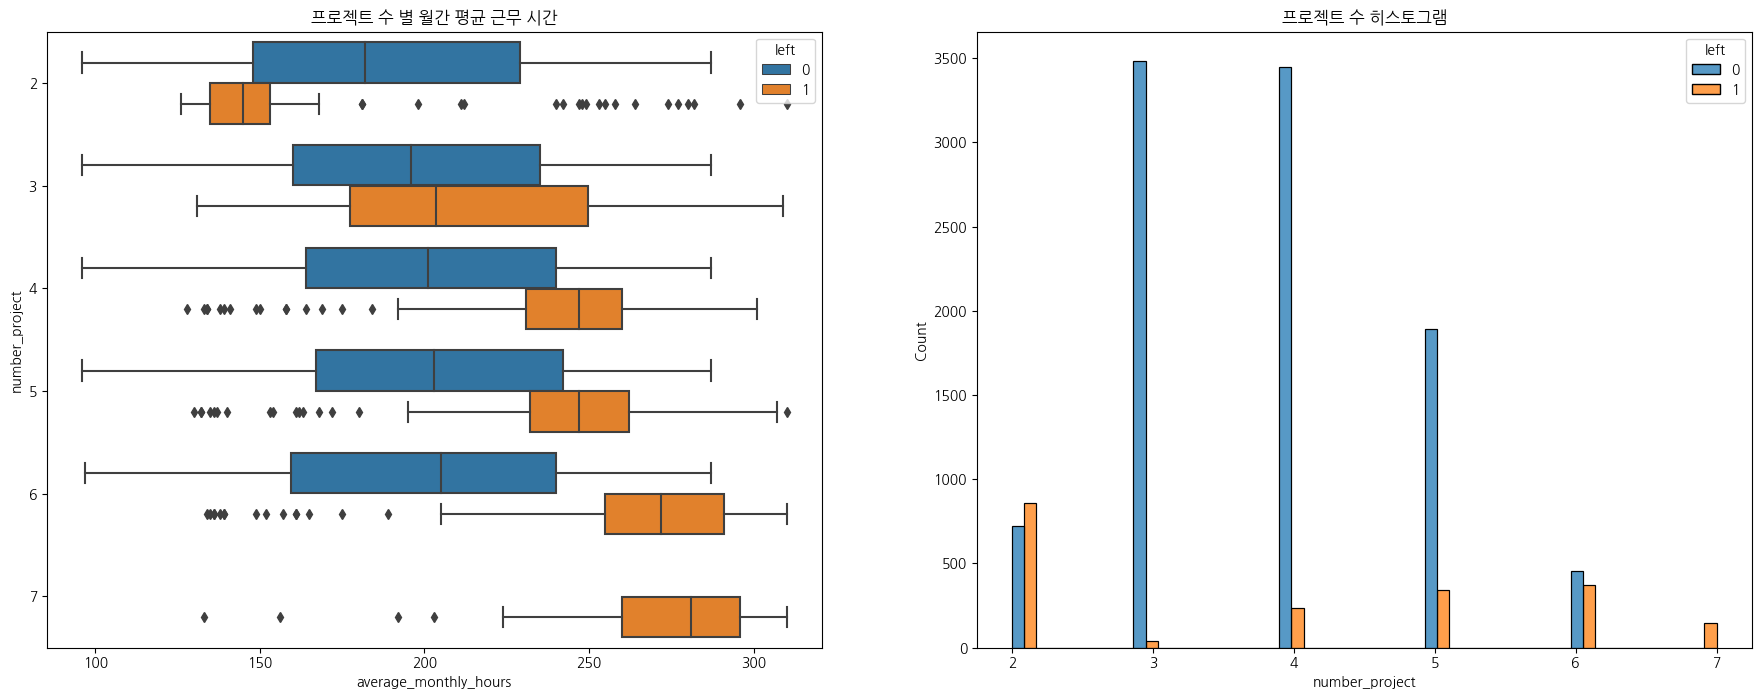

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# 프로젝트 수와 월간 근무시간 관계 시각화
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', orient='h', hue='left', ax=ax[0])
#ax[0].invert_yaxis()
ax[0].set_title('프로젝트 수 별 월간 평균 근무 시간')

# 프로젝트 수와 이직 여부 관계 시각화
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('프로젝트 수 히스토그램')

plt.show()

프로젝트 수가 많아지면 근무시간이 길어지는 것을 볼 수 있고, 이는 쉽게 예상할 수 있는 사실이다.<br>

회사를 떠난 사람들을 두 가지 패턴을 찾아볼 수 있는데 <br>
(1) 같은 프로젝트 수 대비 근무 시간이 상대적으로 적은 그룹<br>
(2) 같은 프로젝트 수 대비 근무 시간이 상대적으로 많은 그룹<br>

1번 그룹의 경우 실적 저하로 인한 해고당한 것으로 추측해볼 수 있고,<br>
2번 그룹의 경우 프로젝트 6개 이상을 맡고 근무 시간이 상대적으로 길었던 사람들이 사직한 것으로 추측할 수 있다.<br>

프로젝트 수를 3개 맡은 사람들이 떠나는 비율이 가장 낮기 때문에 최적의 프로젝트 수라고 볼 수 있다.<br>

일반적으로 주 52시간 근무에, 연간 2주 휴가가 적절한 근무시간이라고 한다면,<br>
52시간 x (52주-2주) / 12개월 = <b>월 평균 약 217시간 근무가 적절한 시간</b>이라고 볼 수 있다.<br>
이는 떠난 4개 이상의 프로젝트를 맡고, 월간 기대 근무시간을 초과한 사람들이 과로로 인해 떠났다고 추측해볼 수 있다.<br>

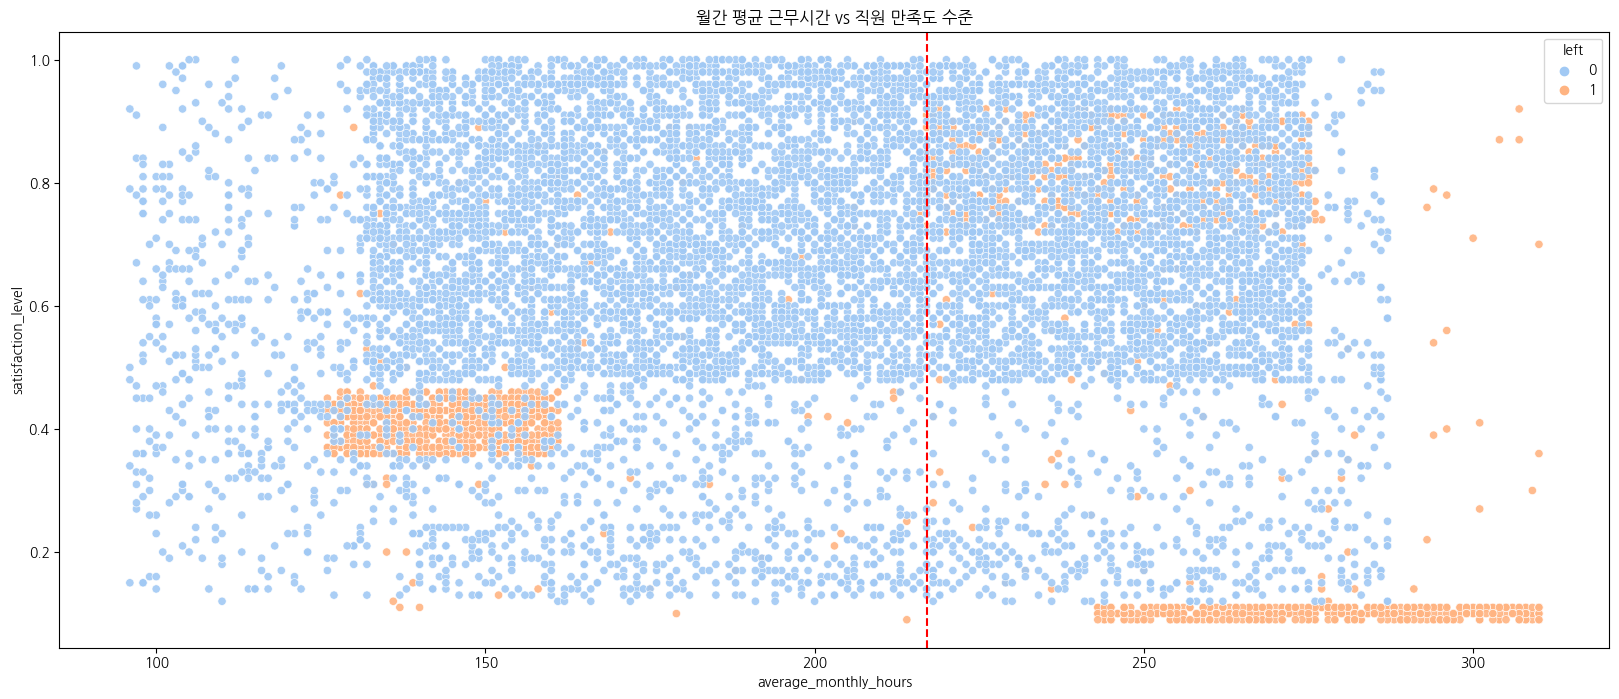

In [16]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df1['average_monthly_hours'], y=df1['satisfaction_level'], hue=df1['left'], palette="pastel", alpha=0.9)
plt.axvline(x=217, color='red', label='217시간 / 월', ls='--')
#plt.legend(labels=['stayed', 'left'])
plt.title('월간 평균 근무시간 vs 직원 만족도 수준')
plt.show()

회사를 떠난 군집 3개가 뚜렷하게 드러난다. <br>

1. 월 240~310시간 초과 근무하면서 만족도가 0에 가까운 군집. 사퇴한 것으로 추측할 수 있다.<br>
2. 월 210~280시간 근무하면서 만족도가 0.7-0.9 사이의 군집. 이직한 것으로 추측할 수 있다.<br>
3. 평균 근무 시간이 낮고 만족도 0.4 부근의 군집. 추측하기 어렵다..<br>

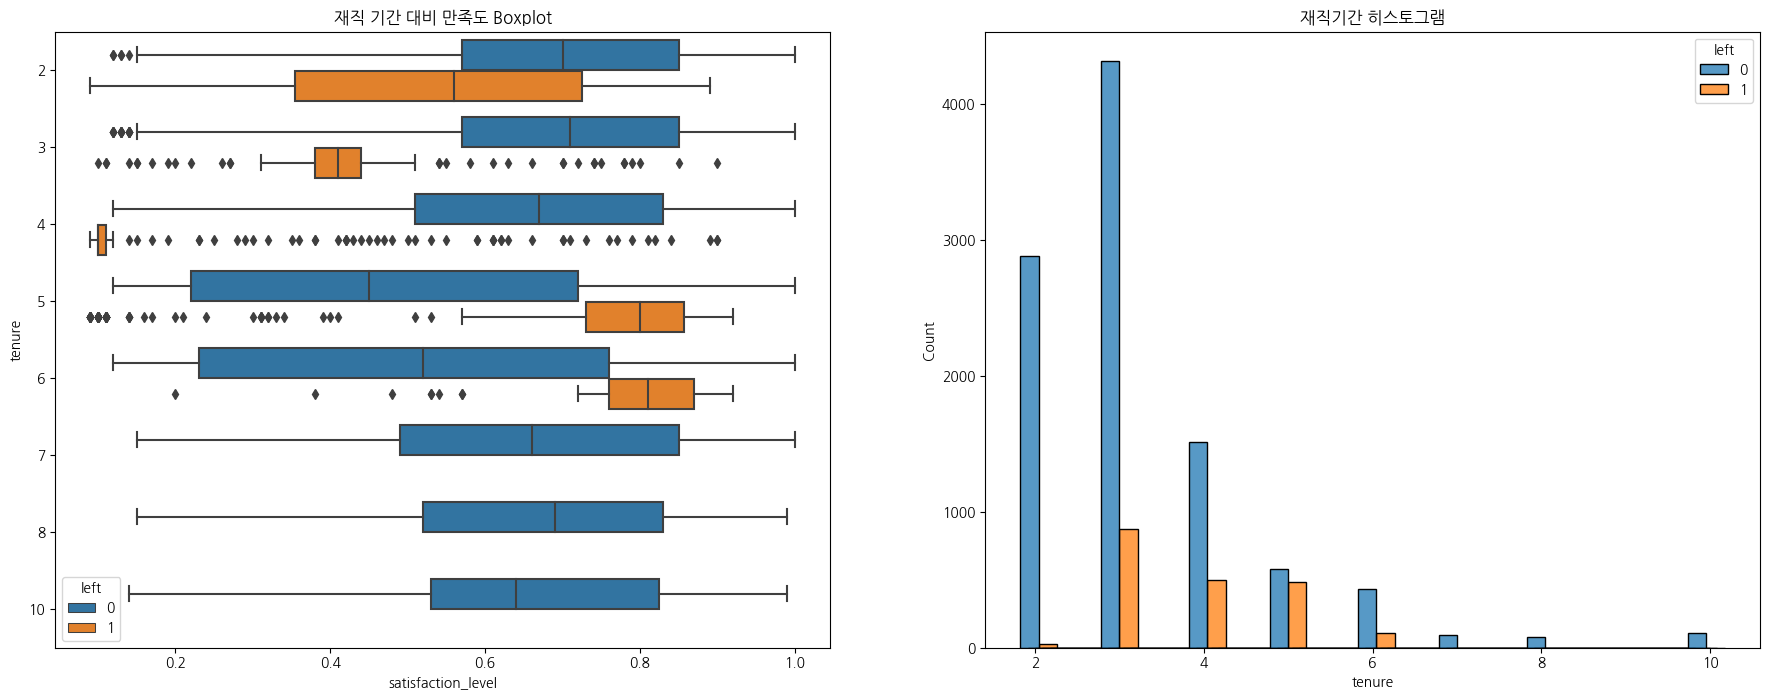

In [17]:
# 재직 기간 대비 만족도
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(x=df1['satisfaction_level'], y=df1['tenure'], hue=df1['left'], orient='h', ax=ax[0])
ax[0].set_title('재직 기간 대비 만족도 Boxplot')

# 재직기간 대비 떠난 사람 분포 확인
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('재직기간 히스토그램')

plt.show()

떠난 사람들을 두 가지 그룹으로 분류해보면<br>

1. 재직기간이 상대적으로 짧고, 만족도가 상대적으로 낮은 그룹<br>
2. 5~6년 차에 만족도가 상대적으로 긴 그룹<br>

4년차에 이례적으로 낮은 만족도에 회사를 떠난 집단은, 예상하기 어렵지만 어떠한 상황이 벌어진 것으로 추측할 수 있다.<br>

가장 오래 근무한 집단은 아무도 떠나지 않을 것을 볼 수 있다.<br>

In [18]:
# 떠난 사람의 만족도가 남은 사람에 비해 더 낮은 것을 볼 수 있다.
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


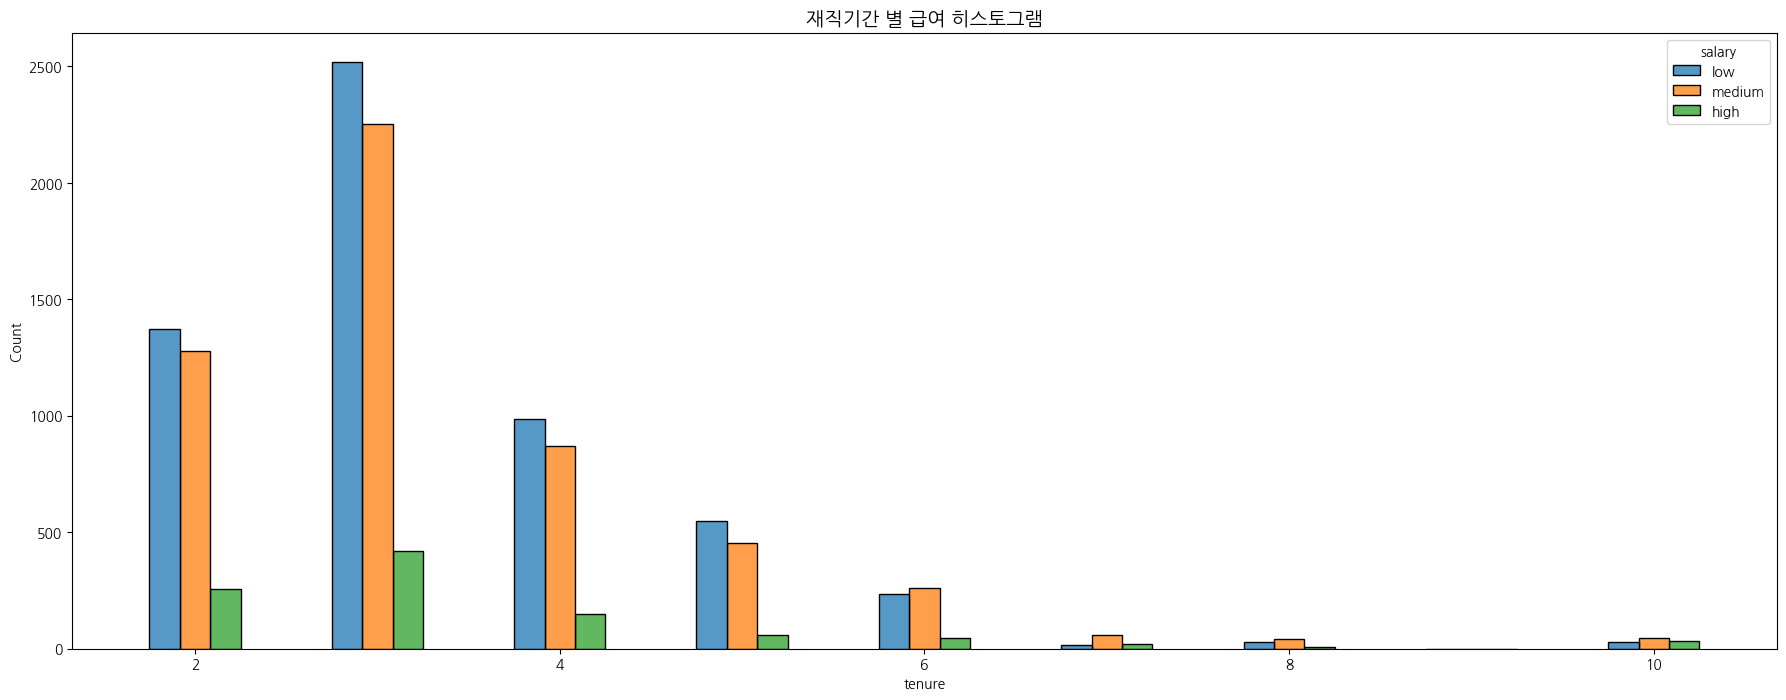

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(22,8))

sns.histplot(data=df1, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.5, discrete=1, ax=ax)
ax.set_title('재직기간 별 급여 히스토그램', fontsize=14)

plt.show()

10년차 직원들 중에 높은 급여를 받는 직원 비율이 높은 편이고, 나머지 다른 연차는 시각화만으로 특별한 패턴을 확인하기 어렵다

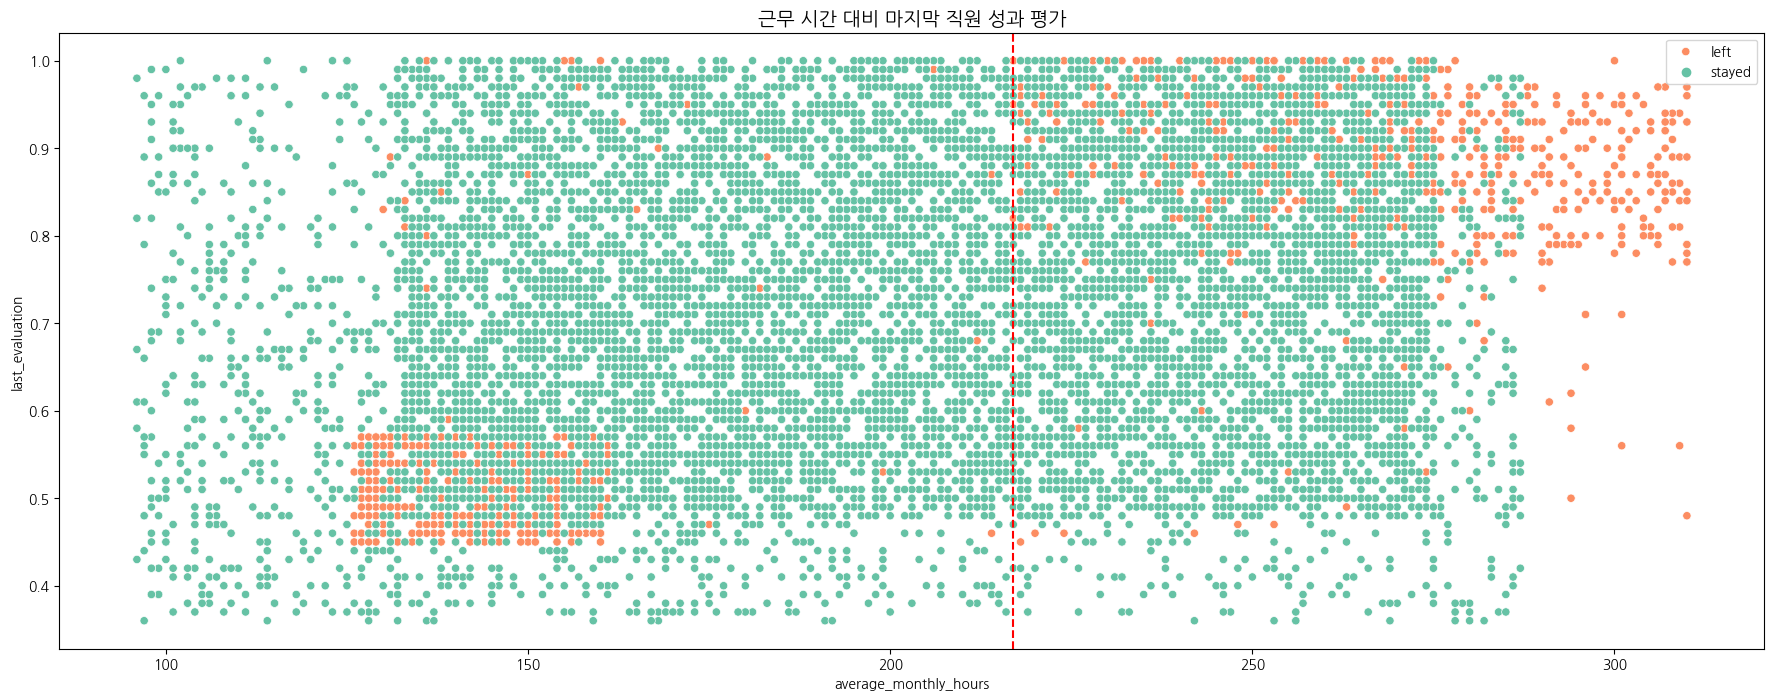

In [20]:
#Scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(22,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', palette="Set2")
plt.axvline(x=217, color='red', label='217시간 / 월', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('근무 시간 대비 마지막 직원 성과 평가', fontsize=14)

plt.show()

근무 시간이 길다고 평가가 좋은 경향을 보이는 것은 아니다.


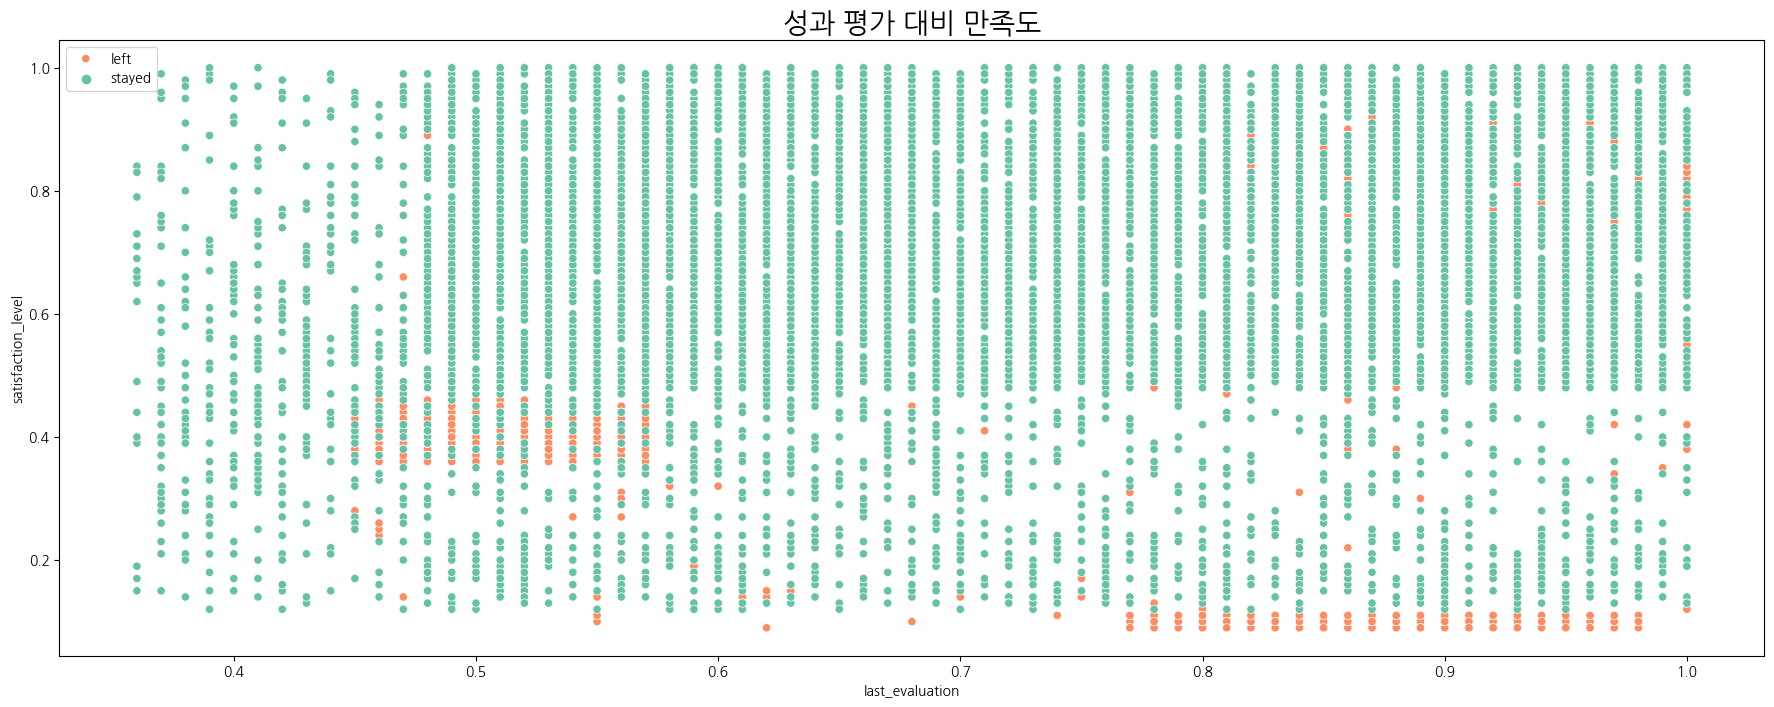

In [21]:
plt.figure(figsize=(22,8))
sns.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level', hue='left', palette="Set2")
#plt.axvline(x=217, color='red', label='217시간 / 월', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('성과 평가 대비 만족도', fontsize=20)

plt.show()

1. 성과가 높은데 만족도가 낮은 그룹 <br>
2. 성과는 평균인데 만족도가 0.4 부근인 그룹이 떠난 것으로 볼 수 있다.

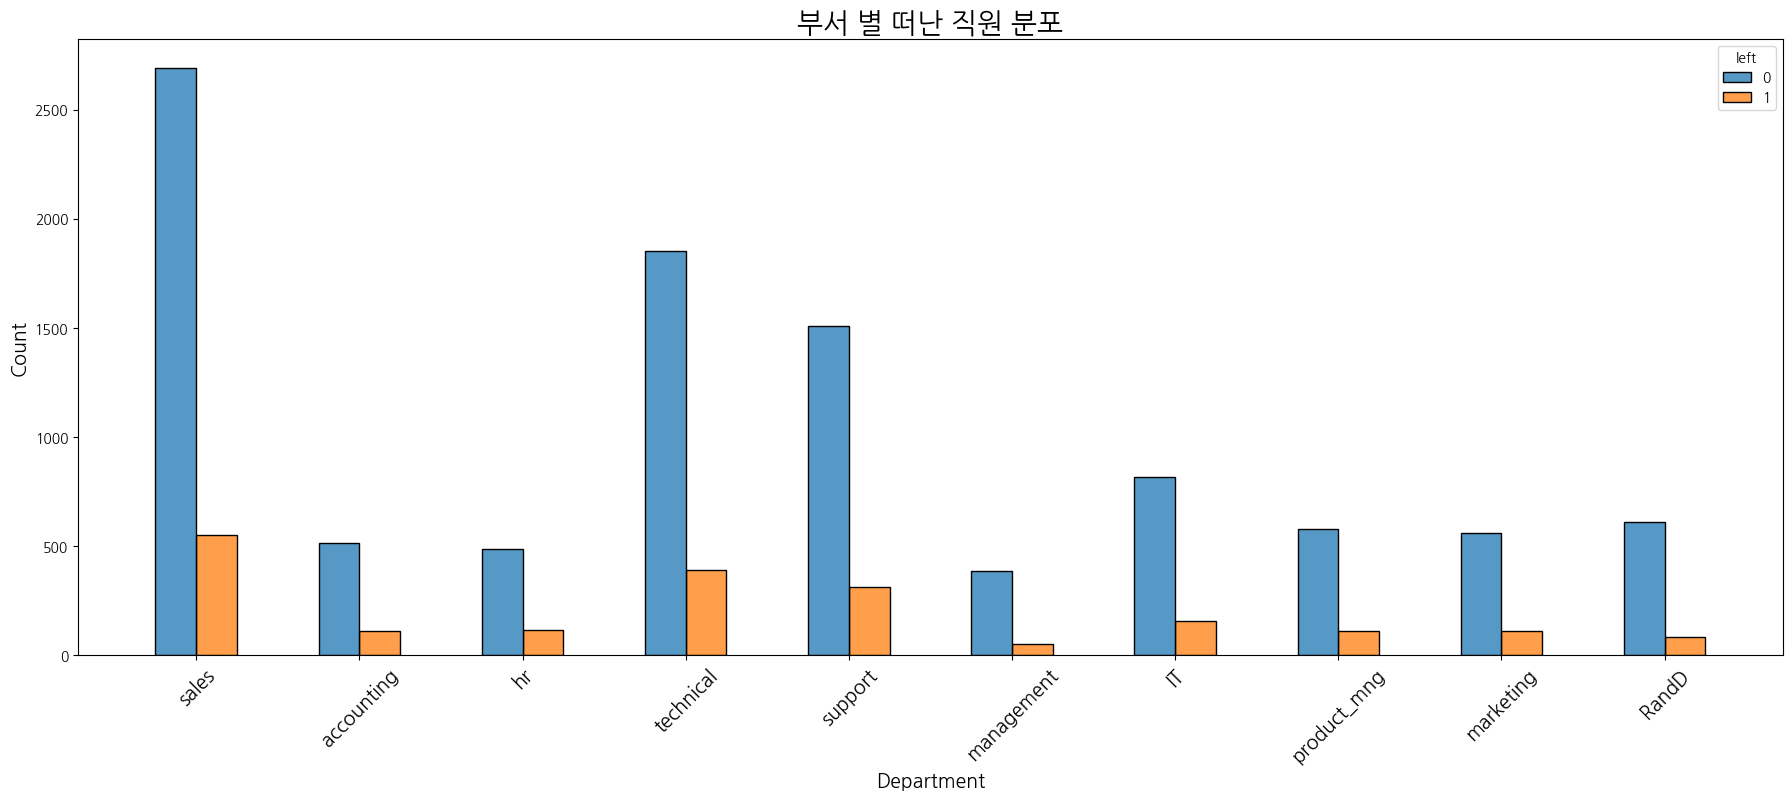

In [22]:
plt.figure(figsize=(22,8))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', discrete=1, shrink=.5, hue_order=[0, 1])
plt.title('부서 별 떠난 직원 분포', fontsize=20)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.show()

C:\Users\lovej\AppData\Local\Temp\ipykernel_10356\1494707911.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True) )
C:\Users\lovej\anaconda3\envs\eeg\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\lovej\anaconda3\envs\eeg\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


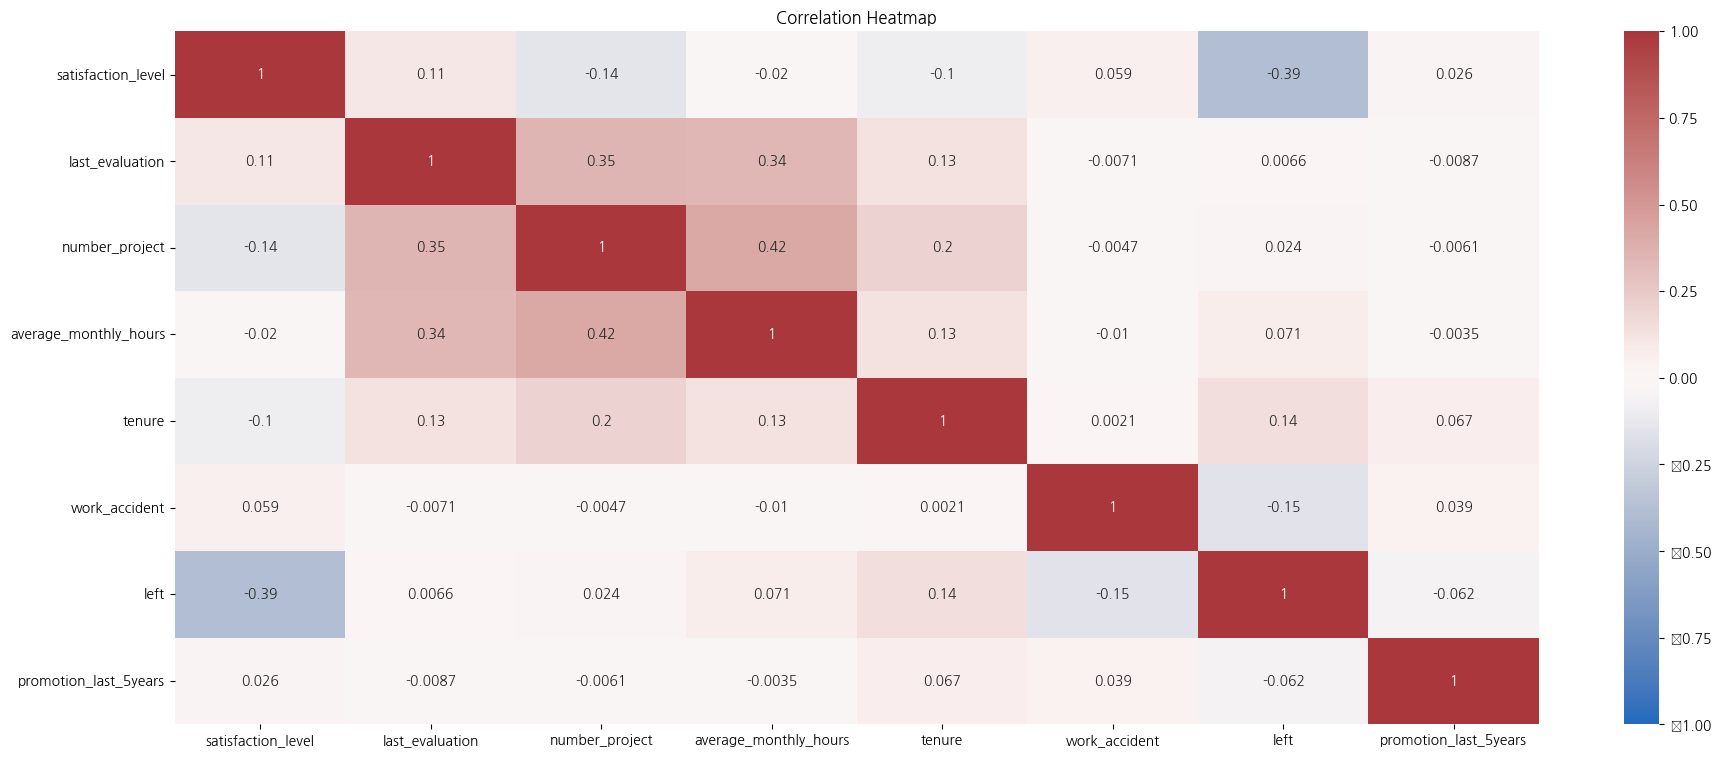

In [23]:
# 타겟 컬럼은 전반적으로 양의 상관계수를 보이며, 만족도와는 음의 상관계수를 보인다.
plt.figure(figsize=(22,9))
sns.heatmap(data=df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True) )
plt.title('Correlation Heatmap')
plt.show()

# 모델링 작업 및 분류

## 로지스틱 회귀 모델

In [24]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


카테고리 변수 처리 (salary, department)

In [25]:
df2 = df1.copy() 

# 'salary` 컬럼은 순서형 변수로 인코딩한다.
df2['salary'] = (
    df2['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# `department` 컬럼은 더미형 변수로 인코딩한다.
df2 = pd.get_dummies(df2, drop_first=False)

df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
y = df2['left']
X = df2.drop('left', axis=1)

# stratify 는 클래스 분포 맞춰서 나눠주는 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23)

In [27]:
log_clf = LogisticRegression(random_state=23, max_iter=500)

In [28]:
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=23)

In [29]:
y_pred = log_clf.predict(X_test)

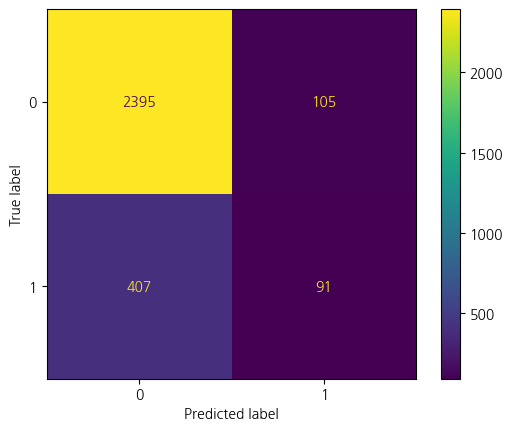

In [30]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot(values_format='')
plt.show()

True negatives: 떠나지 않을 거라 예측했고 실제로 떠나지 않은 사람 수<br>

False positives: 떠날 거라 예측했지만 실제로 떠나지 않은 사람 수<br>

False negatives: 떠나지 않을 거라 예상했지만, 실제로 떠난 사람 수<br>

True positives: 떠날 거라 예상 했고, 실제로 떠난 사람 수<br>

In [31]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.96      0.90      2500
    Predicted would leave       0.46      0.18      0.26       498

                 accuracy                           0.83      2998
                macro avg       0.66      0.57      0.58      2998
             weighted avg       0.79      0.83      0.80      2998



precision 79%, recall 83%, f1 score 80%, accuracy 83%를 기록했지만,<br>
떠날 사람을 예측하는 것에는 현저히 낮은 수치를 보인다.<br>
타겟 클래스 불균형(떠난 사람 수가 현저히 적음)한 것을 감안하면 좋은 모델이라 볼 수 없다.<br>

## 의사결정나무

In [32]:
y = df2['left']
X = df2.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=17)

In [33]:
dt = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth' : [4, 6, 8, None],
             'min_samples_leaf' : [2, 5, 1],
             'min_samples_split' : [2, 4, 6]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

dt1 = GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [34]:
%%time
dt1.fit(X_train, y_train)

CPU times: total: 2.59 s
Wall time: 2.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'precision', 'roc_auc'})

In [35]:
# roc_auc
dt1.best_score_

0.9704023407071822

In [36]:
dt1.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [37]:
# Fit 한 모델의 결과 평가 지표를 데이터테이블로 시각화 하기 위한 함수
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): 테이블에 저장하고 싶은 모델명 지정
        model_object: GridSearchCV 객체
        metric (string): precision, recall, f1, accuracy, 또는 auc
  
    F1, 리콜, 정밀도, 정확도 및 auc 점수와 함께 데이터프레임을 반환

    '''

    # GridSearchCV에서 입력 메트릭스를 실제 메트릭스 이름에 매핑하는 딕셔너리 생성
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # CV에서 모든 결과를 받아 데이터프레임에 담는다.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # 최대(메트릭스) 점수로 데이터프레임 행 분리
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # AUC, Accuracy, precision, recall, f1 score 추출
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # 결과 테이블 생성
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [38]:
dt1_cv_results = make_results('decision tree cv', dt1, 'auc')
dt1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.969867,0.904218,0.935877,0.979428,0.970402


의사결정나무는 오버피팅에 취약할 수 있기에, 과적합 방지를 기대하고자 랜덤 포레스트 모델도 이용해본다.

## 랜덤 포레스트 모델

In [39]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'recall', 'accuracy', 'precision'})

### *** 모델 저장 코드 ***

In [40]:
path = 'saved_models'

In [41]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [42]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [45]:
write_pickle(path, rf1, 'hr_rf1')

In [43]:
rf1 = read_pickle(path, 'hr_rf1')

In [44]:
# AUC 점수
rf1.best_score_

0.9804721848671225

In [45]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [46]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(dt1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.969867  0.904218  0.935877  0.979428  0.970402
              model  precision    recall       F1  accuracy       auc
0  random forest cv   0.955965  0.913596  0.93428   0.97865  0.980472


## XGBoost 모델

In [48]:
xgb = XGBClassifier(random_state=34)

cv_params = {'max_depth': [3,6,9, None], 
             'learning_rate': [0.01, 0.1, 0.3],
             'min_child_weight': [3, 5],
             'colsample_bytree': [0.6, 0.8, 1],
             'n_estimators': [100, 300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [49]:
%%time
xgb1.fit(X_train, y_train)

CPU times: total: 57min 49s
Wall time: 7min 31s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=34, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9, None],
                         'min_child_weight': [3, 5],
                         'n_estimators': [100, 300, 500]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'precision', 'roc_auc'})

In [50]:
write_pickle(path, xgb1, 'hr_xgb1')

In [51]:
xgb1 = read_pickle(path, 'hr_xgb1')

In [52]:
xgb1.best_score_

0.9856200938576747

In [53]:
xgb1.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 500}

In [54]:
xgb1_cv_results = make_results('xgboost cv', xgb1, 'auc')
print(dt1_cv_results)
print(rf1_cv_results)
print(xgb1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.969867  0.904218  0.935877  0.979428  0.970402
              model  precision    recall       F1  accuracy       auc
0  random forest cv   0.955965  0.913596  0.93428   0.97865  0.980472
        model  precision    recall        F1  accuracy      auc
0  xgboost cv   0.985462  0.906227  0.944175  0.982208  0.98562


In [55]:
# 테스트셋을 모델로 예측한 결과로 나온 평가 지표를 테이블로 시각화 하는 함수
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    테스트 점수 테이블을 생성한다.

    입력: 
        model_name (string):  결과 테이블에 저장될 모델 이름
        model:                학습된 GridSearchCV 객체
        X_test_data:          X_test data
        y_test_data:          y_test data

    결과: precision, recall, f1, accuracy, AUC score 담긴 데이터프레임
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [56]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.958848,0.935743,0.947154,0.982655,0.963871


In [57]:
dt1_test_scores = get_scores('Decision tree1 test', dt1, X_test, y_test)
dt1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Decision tree1 test,0.96875,0.933735,0.95092,0.983989,0.963867


In [58]:
xgb1_test_scores = get_scores('XGBoost1 test', xgb1, X_test, y_test)
xgb1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,XGBoost1 test,0.983015,0.929719,0.955624,0.985657,0.963259


학습된 모델로 예측해본 결과 xgboost 모델의 정밀도가 가장 높았지만, <br>
재현율은 랜덤포레스트와 의사결정나무에 비해 낮은 것을 볼 수 있다.

# Feature Engineering 

data leakage 가능성이 있는 컬럼(만족도, 월 평균 근무 시간)을 적절하게 처리하여 다시 분류해본다.

In [59]:
df3 = df2.drop('satisfaction_level', axis=1)
df3.head() 

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
df3['overworked'] = df3['average_monthly_hours']

In [61]:
df3['overworked'] = (df3['overworked'] > 217).astype(int)
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [62]:
df3 = df3.drop('average_monthly_hours', axis=1)
df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
y = df3['left']
X = df3.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

## 의사결정나무

In [64]:
dt = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth' : [4, 6, 8, None],
             'min_samples_leaf' : [2, 5, 1],
             'min_samples_split' : [2, 4, 6]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

dt2 = GridSearchCV(dt, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [65]:
%%time
dt2.fit(X_train, y_train)

CPU times: total: 2.02 s
Wall time: 2.02 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'precision', 'roc_auc'})

In [66]:
dt2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [67]:
dt2.best_score_

0.9566784514439459

In [68]:
dt2_cv_results = make_results('decision tree2 cv', dt2, 'auc')
print(dt1_cv_results)
print(dt2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.969867  0.904218  0.935877  0.979428  0.970402
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.891556  0.898193  0.894601  0.964862  0.956678


## 랜덤포레스트 모델

In [69]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [70]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 13min 1s
Wall time: 13min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'precision', 'roc_auc'})

In [71]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [72]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [73]:
# Best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [74]:
# Best AUC score on CV
rf2.best_score_

0.9672234658523414

## XGBoost 모델

In [76]:
xgb = XGBClassifier(random_state=34)

cv_params = {'max_depth': [3,6,9, None], 
             'learning_rate': [0.01, 0.1, 0.3],
             'min_child_weight': [3, 5],
             'colsample_bytree': [0.6, 0.8, 1],
             'n_estimators': [100, 300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb2 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [77]:
%%time
xgb2.fit(X_train, y_train)

CPU times: total: 58min 45s
Wall time: 7min 57s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=34, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9, None],
                         'min_child_weight': [3, 5],
                         'n_estimators': [100, 300, 500]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'recall', 'precision', 'roc_auc'})

In [78]:
write_pickle(path, xgb2, 'hr_xgb2')

In [79]:
xgb2 = read_pickle(path, 'hr_xgb2')

In [80]:
xgb2.best_score_

0.9731107759506435

In [81]:
xgb2.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100}

In [82]:
# 모든 CV 점수
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
xgb2_cv_results = make_results('xgboost2 cv', xgb2, 'auc')
print(dt2_cv_results)
print(rf2_cv_results)
print(xgb2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.891556  0.898193  0.894601  0.964862  0.956678
               model  precision    recall       F1  accuracy       auc
0  random forest2 cv   0.884746  0.899532  0.89199  0.963861  0.967223
         model  precision    recall        F1  accuracy       auc
0  xgboost2 cv    0.92049  0.890149  0.904986  0.968976  0.973111


Feature engineering 이후 평가 점수가 대폭 낮아졌다.

In [83]:
# 테스트 데이터 예측
xgb2_test_scores = get_scores('xgboost2 test', xgb2, X_test, y_test)
xgb2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,xgboost2 test,0.902439,0.891566,0.89697,0.965977,0.936183


## 가장 좋은 평가 점수 보이는 xgb1의 Confusion matrix. 

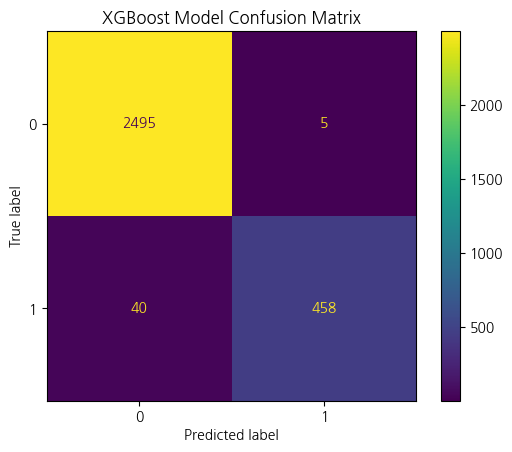

In [101]:
# Confusion matrix 생성
preds = xgb1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Confusion matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb1.classes_)
disp.plot(values_format='')
plt.title('XGBoost Model Confusion Matrix')
plt.show()


이 모델은 false negative가 false positive보다 약소하게 많다. 
이는 나간 직원이 나가지 않을 거라 예측하는 경우가 있다는 걸 의미한다. 
그래도 아주 좋은 예측을 보이는 모델이다.

## 의사결정나무 feature importance 

In [91]:
dt1_importances = pd.DataFrame(dt1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt1_importances = dt1_importances.sort_values(by='gini_importance', ascending=False)

# importances > 0 인 feature만 추출
dt1_importances = dt1_importances[dt1_importances['gini_importance'] != 0]
dt1_importances 

,gini_importance
satisfaction_level,0.498771
last_evaluation,0.147128
number_project,0.143834
tenure,0.119401
average_monthly_hours,0.089204
salary,0.001389
department_support,0.000225
department_technical,0.000048


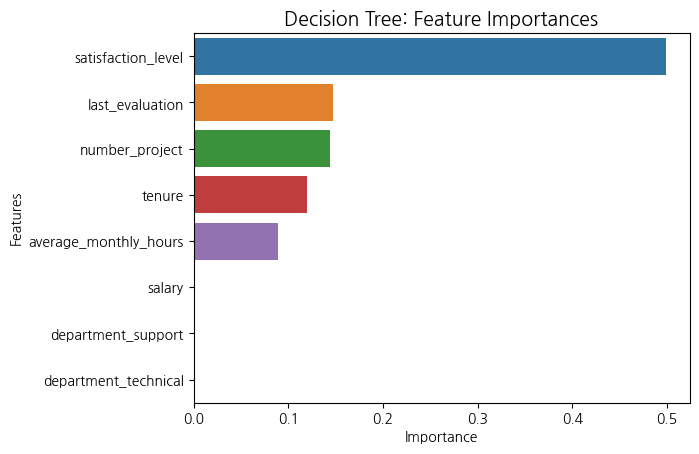

In [94]:
# 의사결정나무 feature importances 시각화
sns.barplot(data=dt1_importances, x="gini_importance", y=dt1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

만족도가 예측에 큰 영향을 미치기 때문에 Feature Engineering이 적절치 못했던 것으로 보인다.<br>

satisfaction_level, last_evaluation, number_project, tenure, average_monthly_hours의 순서로 중요도가 높다.

## 랜덤 포레스트 feature importance 

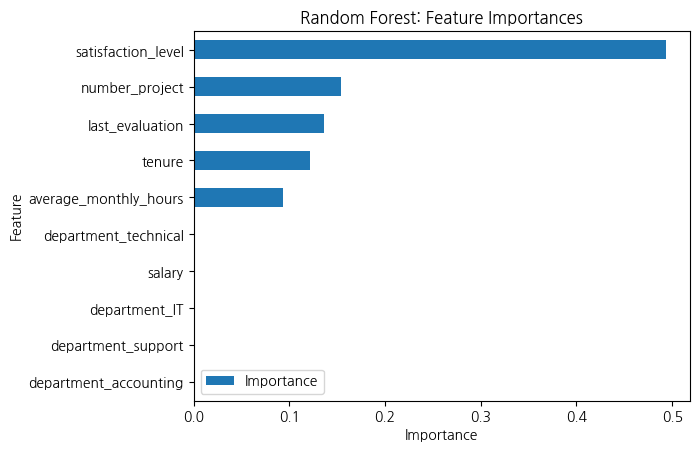

In [96]:
# Get feature importances 
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

의사결정나무와 마찬가지로 satisfaction_level, last_evaluation, number_project, tenure, average_monthly_hours의 순서로 중요도가 높다.

## XGBoost feature importance 

In [99]:
xgb1_importances = pd.DataFrame(xgb1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
xgb1_importances = xgb1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
xgb1_importances = xgb1_importances[xgb1_importances['gini_importance'] != 0]
xgb1_importances

,gini_importance
satisfaction_level,0.366855
tenure,0.175723
number_project,0.168659
last_evaluation,0.142657
average_monthly_hours,0.060726
work_accident,0.037062
salary,0.017931
department_support,0.011122
department_hr,0.010618
department_accounting,0.003678


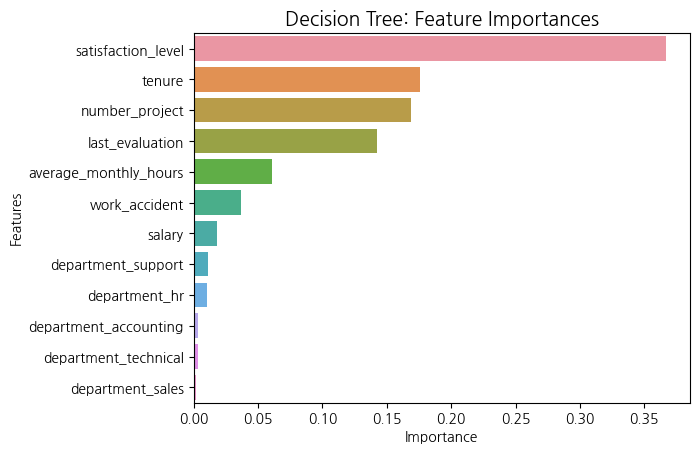

In [100]:
# XGBoost feature importances 시각화
sns.barplot(data=xgb1_importances, x="gini_importance", y=xgb1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

satisfaction_level, tenure, number_project,last_evaluation, average_monthly_hours의 순서로 중요도가 높다.<br>

앞서 두 모델보다 더 많은 컬럼을 사용하였고,<br>

이는 그리드서치 과정에서 파라미터를 달리 했기 때문인데,<br>

다른 모델들도 파라미터를 조정하면 더 좋은 결과를 보였을까 하는 궁금증도 생긴다.<br>

## Evaluation metrics (평가 지표)

- **AUC** 는 ROC curve의 아래 영역이다; 값이 1에 가까울수록 분류 성능이 높음을 의미한다.
- **Precision**  는 분류 결과 타겟 데이터를 양성으로 예측한 것들 중 실제로 타겟 데이터가 양성일 비율을 의미한다.  
- **Recall** 는 타겟 데이터 값이 실제로 양성인 데이터 중에서 분류 결과 양성으로 예측되었을 비율을 의미한다.
- **Accuracy** 는 전체 데이터 중 분류가 올바르게 된 데이터의 비율을 의미한다. 
- **F1-score** 는 precision 과 recall의 조화평균으로 계산한다.


# 모델 결과 요약

**로지스틱 회귀 모델**

로지스텍 회귀 모델로 테스트셋을 분류한 결과는, precision of 79%, recall 83%, f1-score 80% (all weighted averages), accuracy 83%로 <br>
타겟 클래스가 불균형한 것을 고려하였을 때 좋은 모델이라고 판단할 수 없다.


**트리 기반 모델**

의사결정나무: precision of 97%, recall 93%, f1-score 95% (all weighted averages), accuracy 98% <br>
랜덤포레스트: precision of 96%, recall 94%, f1-score 95% (all weighted averages), accuracy 98% <br>
XGBoost:      precision of 98%, recall 93%, f1-score 96% (all weighted averages), accuracy 99% <br>

세 종류의 트리 기반 모델로 분류 해보았을 때, XGBoost 모델이 가장 우수한 분류 성능을 보였다. <br>
data leakage를 감소 시키는 방향으로 feature engineering을 진행한 뒤 성능 향상을 기대하며 분류 작업도 진행해보았지만, 세 분류 모델 평가지표가 크게 하락하였기에 채택하지 않았다. 

# 결론 및 액션 아이템 (Action Item)


분류 모델과 Feature Importance로부터 이 회사의 직원들은 과로하고 있다는 것을 확인하였다.

직원들의 이탈을 막기 위해서 분석 결과에 기반한 몇 가지 액션 아이템을 제안해본다.

* 직원이 작업할 수 있는 프로젝트의 수를 제한한다.
* 최소 4년 이상 회사에 근무한 직원의 승진을 고려해보거나, 4년 차 직원들의 애로사항을 면담을 통해 추가로 조사해본다.
* 직원들이 초과 근무한 것에 대해 명확하게 보상 해주거나, 초과 근무 하도록 요구하지 않는다.
* 초과 근무 수당 정책을 보다 명확하게 직원들에게 알리고, 기대 업무량 및 기대 휴가 일 수가 명확하지 않았다면, 그 기준을 명료하게 설정해야한다.
* 월 200시간 이상 초과 근무하는 직원들에게 높은 점수를 주어서는 안 되고, 더 많은 노력을 기울이는 직원들에게 비례적인 척도를 고려해야 합니다.

# 추가) RUSBoost - 클래스 불균형을 해결하기 위한 모델

RUSBoost는 Random Under-Sampling and Bagging의 약자로, 불균형 데이터 문제를 해결하기 위한 알고리즘 중 하나

ChatGPT에게 머신러닝 기반으로 타겟 클래스 뷸균형을 해결할 수 있는 방법을 물어보았는데, 그중 하나였다.

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import classification_report

In [107]:
rusboost_classifier = RUSBoostClassifier(rf, random_state=17)

In [108]:
rusboost_classifier.fit(X_train, y_train)

RUSBoostClassifier(estimator=RandomForestClassifier(random_state=0),
                   random_state=17)

In [109]:
y_pred = rusboost_classifier.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2500
           1       0.99      0.90      0.95       498

    accuracy                           0.98      2998
   macro avg       0.99      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



RUSBoost 알고리즘을 활용했을 시 평가지표 점수가 더 높은 것을 확인히였다.